In [1]:
# global
homedir = "/u/az6922/"

import random
def generate_srclinkratearr(rttaverage,size,rseed=0):
    random.seed(rseed)
    rateaverage = (rttaverage-1)//2
    diffarr = [random.randint(-rateaverage+1, rateaverage) for _ in range(size)]
    # required_sum = rateaverage * size
    # current_sum = sum(ratearr)1_
    # last_rate = required_sum - current_sum
    # ratearr.append(last_rate)
    ratearr = [rateaverage+diff for diff in diffarr]
    return ratearr

import pickle
import os
def load_stats(dir,q=1,numqueues=2,numports=2,p=0):
    timelist = list()
    bufferpctlist = list()
    qlenlist = list()
    sentlist = list()
    thptlist = list()
    droplist = list()
    threslist = list()
    for i in range(numports * numqueues):
        qlenlist.append(list())
        sentlist.append(list())
        thptlist.append(list())
        droplist.append(list())
        threslist.append(list())

    with open(dir+"tor.tr", 'r') as f:
        lines = f.readlines()[1:]
        for line in lines:
            tokens = line.split()
            timestamp = int(tokens[0])
            buffer = float(tokens[2])
            for i in range(numports * numqueues):
                qlenlist[i].append(int(tokens[3+i*5]))
            for i in range(numports * numqueues):
                thptlist[i].append(float(tokens[3+i*5+1]))
            for i in range(numports * numqueues):
                sentlist[i].append(int(tokens[3+i*5+2]))
            for i in range(numports * numqueues):
                droplist[i].append(int(tokens[3+i*5+3]))
            for i in range(numports * numqueues):
                threslist[i].append(int(tokens[3+i*5+4]))
            timelist.append(timestamp)
            bufferpctlist.append(buffer)
    
    return [timelist,qlenlist[p*numqueues+q],sentlist[p*numqueues+q],thptlist[p*numqueues+q],droplist[p*numqueues+q],threslist[p*numqueues+q]]

def load_output_log(dir):
    # LOG +1.19381e+10ns 316500
    timelist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("LOG"): continue
            tokens = line.split()
            timelist.append(float(tokens[1].rstrip('ns')))
            minbufferlist.append(int(tokens[2]))
    return [timelist,minbufferlist]

def load_output_log_probe(dir):
    # +...ns(time),cmsa,sent,totalbw,n,m,b
    timelist = list()
    cmsalist = list()
    sentlist = list()
    targetlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            timelist.append(float(tokens[0].rstrip('ns')))
            cmsa=int(tokens[1])
            cmsalist.append(cmsa)
            sentlist.append(int(tokens[2]))
            totalbw=float(tokens[3])
            n=int(tokens[4])
            m=float(tokens[5])
            b=float(tokens[6])
            target=float(tokens[7].rstrip('\n'))
            targetlist.append(target)
    return [timelist,cmsalist,sentlist,targetlist]

def load_output_data(dir):
    # DATA,+1.1099e+11ns,93000,6241500,19500
    cmsalist = list()
    sentlist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("DATA"): continue
            tokens = line.split(',')
            cmsalist.append(int(tokens[2]))
            sentlist.append(int(tokens[3]))
            minbufferlist.append(int(tokens[4]))
    return [cmsalist,sentlist,minbufferlist]

def load_output_convergence(dir):
    # +5.54904e+10ns,39800,6243000,6243001,16500,97,0,0,0,39800,0
    # time,cmsa,sent,3,minbuffer,5,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    # timelist = list()
    # cmsalist = list()
    # sentlist = list()
    # minbufferlist = list()
    # mlist = list()
    # blist = list()
    # targetlist = list()
    # minfulllist = list()
    # maxnonfulllist = list()

    # +2.7799e+11ns,45,90950,6241500,6243001,4500,528,0,0,0,90950,90350
    # time,proberid,cmsa,sent,4,minbuffer,6,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    timedict = dict()
    cmsadict = dict()
    sentdict = dict()
    minbufferdict = dict()
    mdict = dict()
    bdict = dict()
    targetdict = dict()
    minfulldict = dict()
    maxnonfulldict = dict()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            if tokens[1]=="pass" or tokens[1]=="maxbuffer": continue
            proberid = int(tokens[1])
            if proberid not in timedict:
                timedict[proberid] = list()
                cmsadict[proberid] = list()
                sentdict[proberid] = list()
                minbufferdict[proberid] = list()
                mdict[proberid] = list()
                bdict[proberid] = list()
                targetdict[proberid] = list()
                minfulldict[proberid] = list()
                maxnonfulldict[proberid] = list()
            timedict[proberid].append(float(tokens[0].rstrip('ns')))
            cmsadict[proberid].append(int(tokens[2]))
            sentdict[proberid].append(int(tokens[3]))
            minbufferdict[proberid].append(int(tokens[5]))
            mdict[proberid].append(float(tokens[7]))
            bdict[proberid].append(float(tokens[8]))
            targetdict[proberid].append(float(tokens[9]))
            minfulldict[proberid].append(int(tokens[10]))
            maxnonfulldict[proberid].append(int(tokens[11]))
    # return [timelist,cmsalist,sentlist,minbufferlist,mlist,blist,targetlist,minfulllist,maxnonfulllist]
    return [timedict,cmsadict,sentdict,minbufferdict,mdict,bdict,targetdict,minfulldict,maxnonfulldict]

def load_bct(dir,numsender,startsender,simend,numburst):
    startlist = list()
    endlist = list()
    for i in range(numsender):
        with open(f"{dir}gpt_sender{i+startsender}_app0.tr",'r') as f:
            lines = f.readlines()
            for j in range(numburst):
                if len(lines) > j: startlist.append(int(lines[j].split()[0]))
                if len(lines) < numburst*2 and (len(lines)-numburst) < (j+1):
                    endlist.append(simend*1000000)
                else:
                    endlist.append(int(lines[j+numburst].split()[0]))
    return [startlist,endlist]

def load_gpt(dir,numsender):
    # 2100 FlowId 1000 TotalBytes 5611000 SocketState 4 TcpCongState 0 GoodputRxBytes 369240 ThisGoodputRxBytes 369240
    returnlist = list()
    for i in range(numsender):
        timemslist = list()
        thptlist = list()
        gptlist = list()
        with open(f"{dir}gpt_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split()
                timemslist.append(int(tokens[0]))
                thptlist.append(int(tokens[4]))
                gptlist.append(int(tokens[10]))
        returnlist.append([timemslist,thptlist,gptlist])
    return returnlist

def load_fct(dir,numsender,startsender):
    # 51022105 FlowId 20000 TotalBytes 5241760
    # 71516996 FlowId 20000 TotalBytes 10000000
    returnlist = list()
    for i in range(startsender,startsender+numsender):
        with open(f"{dir}fct_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                returnlist.append(0)
            else:
                startfct = int(lines[0].split()[0])
                endfct = int(lines[1].split()[0])
                returnlist.append(endfct-startfct)
    return returnlist

def load_output_zero(fdir):
    intervallist = list()
    shouldstart = False
    with open(f"{fdir}output.tr",'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            if shouldstart:
                intervalstart = int(tokens[0])
                interval = int(tokens[1])
                intervallist.append([intervalstart,intervalstart+interval])
            else:
                if tokens[0]=="DesignZeroVec":
                    shouldstart = True
    return intervallist

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd
import math

def linear_regression(xarr,yarr):
    x = np.array(xarr)
    y = np.array(yarr)

    # Number of data points
    N = len(x)

    # Calculate the slope (m) and intercept (b) using the formulas
    # m = (N * Σ(xi * yi) - Σxi * Σyi) / (N * Σ(xi^2) - (Σxi)^2)
    # b = (Σyi - m * Σxi) / N

    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    # # Display the equation of the best-fit line
    # print(f"Slope: {m:.2f}, Intercept: {b:.2f}")

    # # Create the best-fit line using the model equation
    # y_pred = m * x + b

    return [m,b]

def get_targetbw(cca,nfstr,rttstr):
    with open(f"{homedir}Buffer/experiments/bulk_dec2624/cca{cca}_maxthpt.txt") as fread:
        lines = fread.readlines()
        for line in lines:
            tokens = line.split(',')
            if nfstr==tokens[0] and rttstr==tokens[1]:
                targetbw_raw = float(tokens[2])
                break
    targetbw = int(((targetbw_raw // 1500)+1) * 1500+1)
    return targetbw

def merge_intervals(intervals):
    if not intervals:
        return []

    merged = [intervals[0]]  # Start with the first interval

    for start, end in intervals[1:]:
        last_start, last_end = merged[-1]

        # If the end of the last interval matches the start of the new interval, merge them
        if last_end == start:
            merged[-1] = (last_start, end)  # Extend the last interval
        else:
            merged.append((start, end))  # Otherwise, add it as a new interval

    return merged

trial 3

In [2]:
webtraceidlist = [26,141]

ns3seed = 1
numsinks=1
seed = 1
smoothcollection = 500
q=1
middelay = 1
midbw = 1000
srcbw = midbw*2
middelaystr=f"{middelay}"
srcbwstr=f"{srcbw}"
midbwstr=f"{midbw}"
mi=500
parstring = "5_10_50_3_3_3_5_10_3_5_1_10_5"
smooththreshold = 0
mrnq=12

ccanamearr=["realmix"]
rttarr=[300]
numflownamearr=["small"]
smoothwindow = 100
confseedarr = range(10)

numwebtraces = 1
numflowinburst = 1
srclinkrate = 2
sim=20

In [3]:
with open(f'{homedir}az6922_data/pickle/burstnew.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

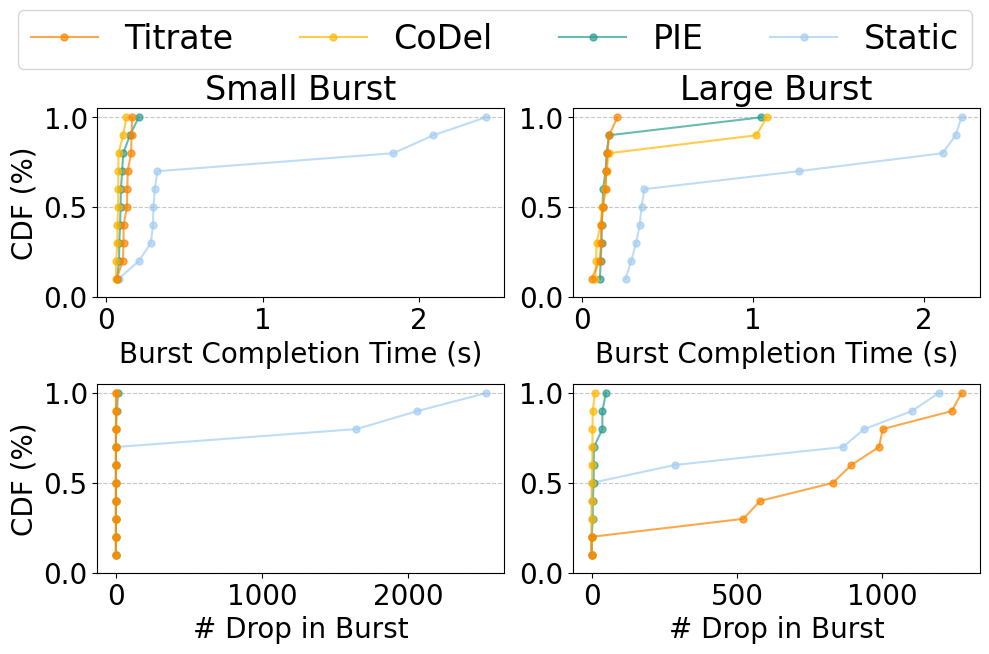

In [4]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','D']
arrstart = 0 
arrend = 20000
nr = 2
nc = 2
fig,axs = plt.subplots(nr,nc,figsize=(5*nc,3*nr))

ccaname = ccanamearr[0]
numflowname = numflownamearr[0]
rtt = rttarr[0]
for ischeme,scheme in enumerate(schemearr):
    for iw,wtid in enumerate(webtraceidlist):

        wwwtdroplist = list()
        wwwtdurationlist = list()
        for confseed in confseedarr:
            configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
        
            datator = datadict[configname][scheme]["tor"]
            time = datator[0][arrstart:arrend]
            qlen = datator[1][arrstart:arrend]
            sent = datator[2][arrstart:arrend]
            thpt = datator[3][arrstart:arrend]
            drop = datator[4][arrstart:arrend]
            thres = datator[5][arrstart:arrend]

            avgqlat = (sum(qlen)/len(qlen) / 1000000) /(1000/8)*1000000000
            # print(avgqlat)

            dataxml = datadict[configname][scheme]["xml"]
            wtstartlist = dataxml[0][arrstart:arrend]
            wtendlist = dataxml[1][arrstart:arrend]
            wtdrop = dataxml[2][arrstart:arrend]

            # wtduration = list()
            # wtsumdrop = list()
            for i in range(numwebtraces):
                wwwtdurationlist.append((max(wtendlist[i])-min(wtstartlist[i])-avgqlat)/1000000000)
                wwwtdroplist.append(sum(wtdrop[i]))
    
        sorted_wwwtdroplist = np.sort(wwwtdroplist)
        cdf = np.arange(1, len(sorted_wwwtdroplist) + 1) / len(sorted_wwwtdroplist)
        if iw==0:
            axs[1,iw].plot(sorted_wwwtdroplist,cdf,label=schemenamearr[ischeme],marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))
        else:
            axs[1,iw].plot(sorted_wwwtdroplist,cdf,marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))

        sorted_wwwtdurationlist = np.sort(wwwtdurationlist)
        cdf = np.arange(1, len(sorted_wwwtdurationlist) + 1) / len(sorted_wwwtdurationlist)
        axs[0,iw].plot(sorted_wwwtdurationlist,cdf,marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))

axs[0,0].set_title("Small Burst",fontsize=24)
axs[0,1].set_title("Large Burst",fontsize=24)
axs[0,0].set_ylabel("CDF (%)",fontsize=20)
axs[1,0].set_ylabel("CDF (%)",fontsize=20)
axs[0,0].set_xlabel("Burst Completion Time (s)",fontsize=20)
axs[0,1].set_xlabel("Burst Completion Time (s)",fontsize=20)
axs[1,0].set_xlabel("# Drop in Burst",fontsize=20)
axs[1,1].set_xlabel("# Drop in Burst",fontsize=20)

for i in [0,1]:
    for j in [0,1]:
        axs[i,j].set_ylim(0,1.05)
        axs[i,j].tick_params(axis='x', labelsize=20)
        axs[i,j].tick_params(axis='y', labelsize=20)
        axs[i,j].grid(axis='y', linestyle='--', alpha=0.7)

fig.legend(loc="upper center",ncol=4,bbox_to_anchor=(0.5,1.11),fontsize=24)
fig.tight_layout()
# fig.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_burst/burst.pdf', bbox_inches='tight', dpi=500)
fig.show()

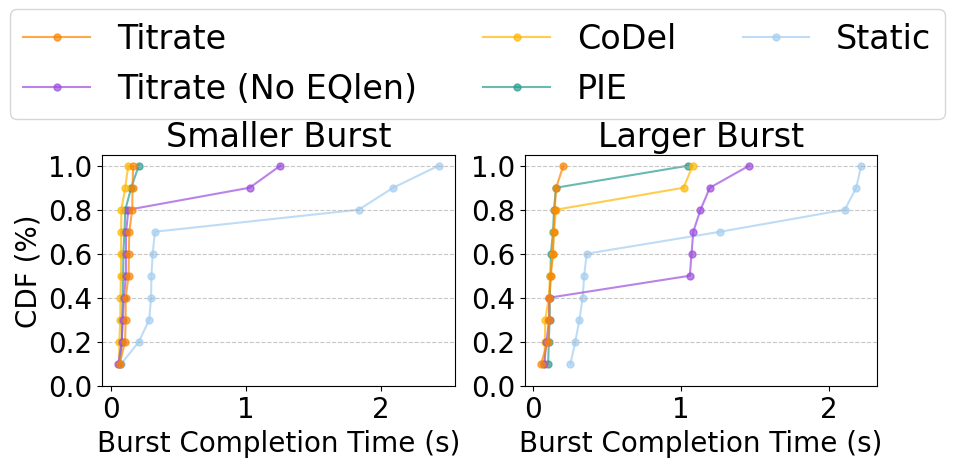

In [19]:
schemearr = ["titrate","p","codel","pie","static"]
schemenamearr = ["Titrate","Titrate (No EQlen)","CoDel","PIE","Static"]
colorarr = ["#fb8500","#9d4edd","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','o','^','v','D']
arrstart = 0 
arrend = 20000
nr = 1
nc = 2
fig,axs = plt.subplots(nr,nc,figsize=(5*nc,3*nr))

ccaname = ccanamearr[0]
numflowname = numflownamearr[0]
rtt = rttarr[0]
for ischeme,scheme in enumerate(schemearr):
    for iw,wtid in enumerate(webtraceidlist):

        wwwtdroplist = list()
        wwwtdurationlist = list()
        for confseed in confseedarr:
            configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
        
            datator = datadict[configname][scheme]["tor"]
            time = datator[0][arrstart:arrend]
            qlen = datator[1][arrstart:arrend]
            sent = datator[2][arrstart:arrend]
            thpt = datator[3][arrstart:arrend]
            drop = datator[4][arrstart:arrend]
            thres = datator[5][arrstart:arrend]

            avgqlat = (sum(qlen)/len(qlen) / 1000000) /(1000/8)*1000000000
            # print(avgqlat)

            dataxml = datadict[configname][scheme]["xml"]
            wtstartlist = dataxml[0][arrstart:arrend]
            wtendlist = dataxml[1][arrstart:arrend]
            wtdrop = dataxml[2][arrstart:arrend]

            # wtduration = list()
            # wtsumdrop = list()
            for i in range(numwebtraces):
                wwwtdurationlist.append((max(wtendlist[i])-min(wtstartlist[i])-avgqlat)/1000000000)
                wwwtdroplist.append(sum(wtdrop[i]))
    
        # sorted_wwwtdroplist = np.sort(wwwtdroplist)
        # cdf = np.arange(1, len(sorted_wwwtdroplist) + 1) / len(sorted_wwwtdroplist)
        # if iw==0:
        #     axs[iw].plot(sorted_wwwtdroplist,cdf,label=schemenamearr[ischeme],marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))
        # else:
        #     axs[iw].plot(sorted_wwwtdroplist,cdf,marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))

        sorted_wwwtdurationlist = np.sort(wwwtdurationlist)
        cdf = np.arange(1, len(sorted_wwwtdurationlist) + 1) / len(sorted_wwwtdurationlist)
        if iw==0:
            axs[iw].plot(sorted_wwwtdurationlist,cdf,label=schemenamearr[ischeme],marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))
        else:
            axs[iw].plot(sorted_wwwtdurationlist,cdf,marker='.',markersize=10,alpha=0.7,color=colorarr[ischeme],zorder=(4-ischeme))

axs[0].set_title("Smaller Burst",fontsize=24)
axs[1].set_title("Larger Burst",fontsize=24)
axs[0].set_ylabel("CDF (%)",fontsize=20)
axs[0].set_xlabel("Burst Completion Time (s)",fontsize=20)
axs[1].set_xlabel("Burst Completion Time (s)",fontsize=20)
# axs[1].set_xlabel("# Drop in Burst",fontsize=20)

for i in [0,1]:
    axs[i].set_ylim(0,1.05)
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    axs[i].set_yticks([0,0.2,0.4,0.6,0.8,1])

# axs[1].set_xticks([1,3,5])

fig.legend(loc="upper center",ncol=3,bbox_to_anchor=(0.5,1.42),fontsize=24)
# fig.tight_layout()
fig.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_burst/burst.pdf', bbox_inches='tight', dpi=500)
fig.show()

In [24]:
arrstart = 0 
arrend = 20000
ccaname = ccanamearr[0]
numflowname = numflownamearr[0]
rtt = rttarr[0]
for ischeme,scheme in enumerate(schemearr):
    for iw,wtid in enumerate(webtraceidlist):

        wwwtdroplist = list()
        wwwtdurationlist = list()
        for confseed in confseedarr:
            configname = f"wt{wtid}_cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
        
            datator = datadict[configname][scheme]["tor"]
            time = datator[0][arrstart:arrend]
            qlen = datator[1][arrstart:arrend]
            sent = datator[2][arrstart:arrend]
            thpt = datator[3][arrstart:arrend]
            drop = datator[4][arrstart:arrend]
            thres = datator[5][arrstart:arrend]

            avgqlat = (sum(qlen)/len(qlen) / 1000000) /(1000/8)*1000000000
            # print(avgqlat)

            dataxml = datadict[configname][scheme]["xml"]
            wtstartlist = dataxml[0][arrstart:arrend]
            wtendlist = dataxml[1][arrstart:arrend]
            wtdrop = dataxml[2][arrstart:arrend]

            # wtduration = list()
            # wtsumdrop = list()
            for i in range(numwebtraces):
                wwwtdurationlist.append((max(wtendlist[i])-min(wtstartlist[i])-avgqlat)/1000000000)
                wwwtdroplist.append(sum(wtdrop[i]))

        sorted_wwwtdurationlist = np.sort(wwwtdurationlist)
        print(f"{wtid},{scheme},{sorted_wwwtdurationlist[8]:.4f},{sorted_wwwtdurationlist[9]:.4f}")

26,titrate,0.1623,0.1665
141,titrate,0.1569,0.2060
26,p,1.0288,1.2557
141,p,1.1961,1.4605
26,codel,0.1082,0.1300
141,codel,1.0182,1.0798
26,pie,0.1521,0.2079
141,pie,0.1559,1.0478
26,static,2.0913,2.4265
141,static,2.1846,2.2188


In [29]:
(1.1961-0.1569)/1.1961

0.8688236769500878